In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
magnitude = np.load('magnitude.npy')
magnitude.shape

(250, 300)

In [40]:
x = np.array([True, True, False, True])
y = np.array([False, True, False, True])
x & y

array([False,  True, False,  True])

In [45]:
np.diff(x)

array([False,  True,  True])

In [50]:
(False - True) == False

False

In [ ]:
1101
1101
    
101
110
010    



In [75]:
frame_height = 1080

t = np.linspace(0, nperseg / rate, nperseg, dtype=track.dtype)
f = np.geomspace(30, nperseg // 2, frame_height) # second arg: nperseg//2 (Nyquist limit)    
T, F = np.meshgrid(t, f)

E = np.array(np.exp(-2j * np.pi * F * T), dtype=np.complex64) # complex64: Complex number, represented by two 32-bit floats (real and imaginary components)

NameError: name 'nperseg' is not defined

In [44]:
np.diff([4, 2, 3])

array([-2,  1])

In [12]:
from scipy.signal import argrelextrema, argrelmin, argrelmax, find_peaks, gaussian, deconvolve, correlate2d
from scipy.interpolate import interp1d

In [174]:
# argrelextrema(m, np.greater)[0]
# argrelmax(m)
peaks = find_peaks(m)[0]
peaks = np.r_[0, peaks, len(m) - 1]
peaks

array([  0,  14,  48,  69,  98, 129, 163, 219, 251, 272, 285, 299])

In [177]:
np.r_[np.array([1, 2, 3]), np.array([4, 5, 6])]

array([1, 2, 3, 4, 5, 6])

In [179]:
min_peaks = argrelmin(m)[0]
max_peaks = argrelmax(m)[0]

In [182]:
len(np.r_[min_peaks, max_peaks])

20

In [193]:
peaks = np.r_[0, min_peaks, max_peaks, len(m) - 1]
vals = np.r_[m[0], m[min_peaks] - 1000, m[max_peaks], m[len(m) - 1]]

f = interp1d(peaks, vals)

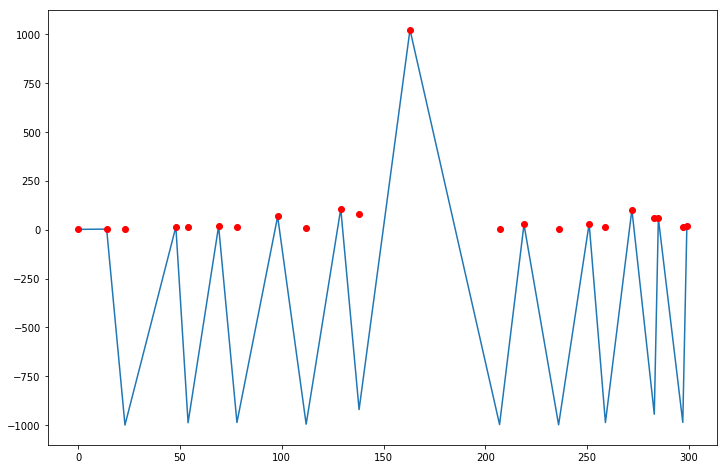

In [201]:
z = f(np.arange(len(m)))

plt.figure(figsize=(12, 8))
plt.plot(z)
plt.plot(peaks, m[peaks], 'ro')

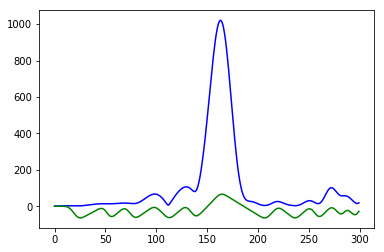

In [203]:
kernel = gaussian(50, std=3)
plt.plot(m, 'b')
plt.plot(np.correlate(z/100, kernel, mode='same'), 'g')
# plt.plot(np.correlate(m, kernel, mode='same'), 'g')

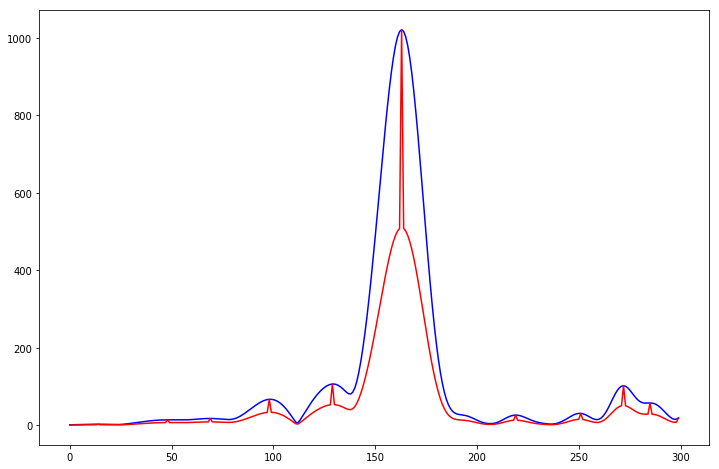

In [140]:
m = magnitude[100]
plt.figure(figsize=(12, 8))
plt.plot(m, 'b')


max_mask = np.r_[True, m[1:] > m[:-1]] & np.r_[m[:-1] > m[1:], True]
min_mask = np.r_[True, m[1:] < m[:-1]] & np.r_[m[:-1] < m[1:], True]

# plt.plot(min_mask * 1000, 'r')


# sharp_peaks = np.zeros_like(m)
sharp_peaks = m / 2
sharp_peaks[max_mask] = m[max_mask]
# sharp_peaks[min_mask] = -m[min_mask]
plt.plot(sharp_peaks, 'r')

# kernel = np.hanning(4)
kernel = gaussian(50, std=3)
# plt.plot(np.correlate(sharp_peaks, kernel, mode='same'), 'g')
# plt.plot(np.correlate(m, kernel, mode='same'), 'g')

In [84]:
magnitude.min()

0.01584509113692939

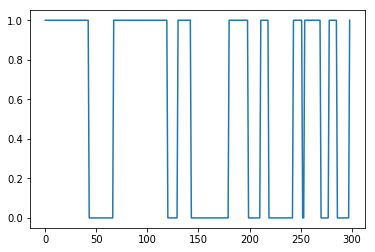

In [32]:
m = magnitude[50]
# plt.plot(m)
plt.plot(m[1:] > m[:-1])

In [60]:
N = 1024
t = np.linspace(0, 1, N)

c0 = np.cos(2*np.pi *   4 * t)
c1 = np.cos(2*np.pi *  10 * t)
c2 = np.cos(2*np.pi * 120 * t)

signal = c0 + c1 + c2

In [61]:
f_n = 500
f = np.linspace(0, 200, f_n).reshape(-1, 1)
cosines = np.cos(
    np.ones((f_n, N)) * t * 2 * np.pi * f
)

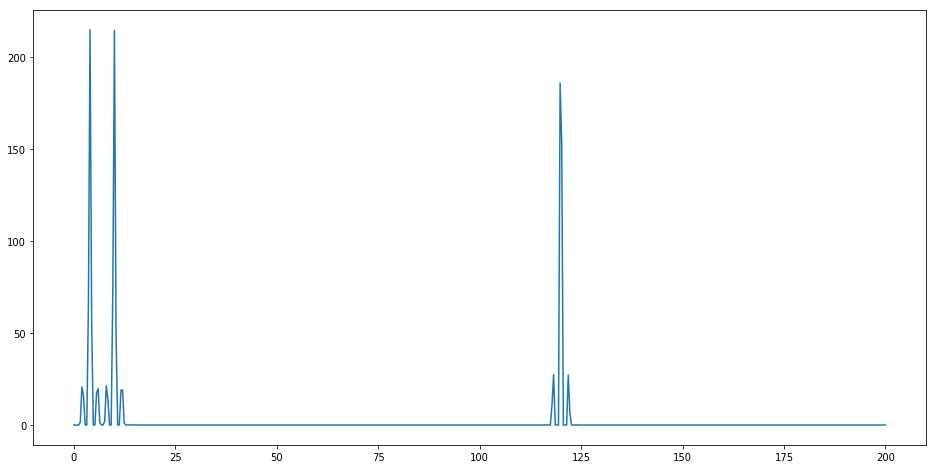

In [73]:
correl = np.sum(cosines * signal * np.blackman(N), axis=1)
correl = np.clip(correl, 0, 300)
plt.figure(figsize=(16, 8))
plt.plot(f, correl)

In [ ]:
correl = np.clip

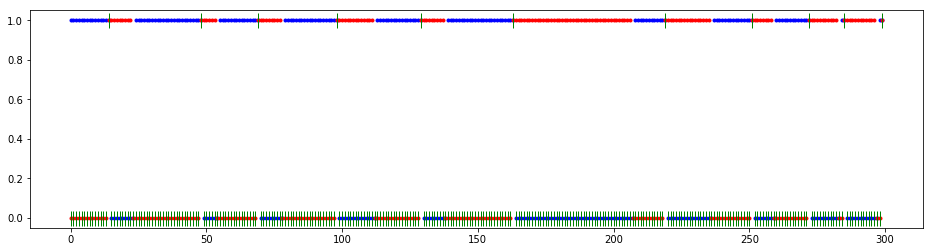

In [268]:
plt.figure(figsize=(16, 4))

a = np.r_[True, m[1:] > m[:-1]]
b = np.r_[m[:-1] > m[1:], True]
plt.plot(a,'b.')
plt.plot(b,'r.')
plt.plot(a & b,'g|', markersize=15)

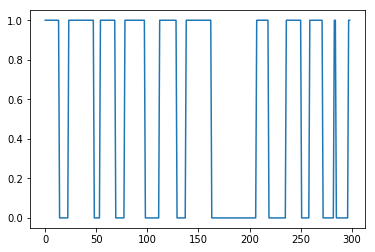

In [220]:
plt.plot(m[1:] > m[:-1])

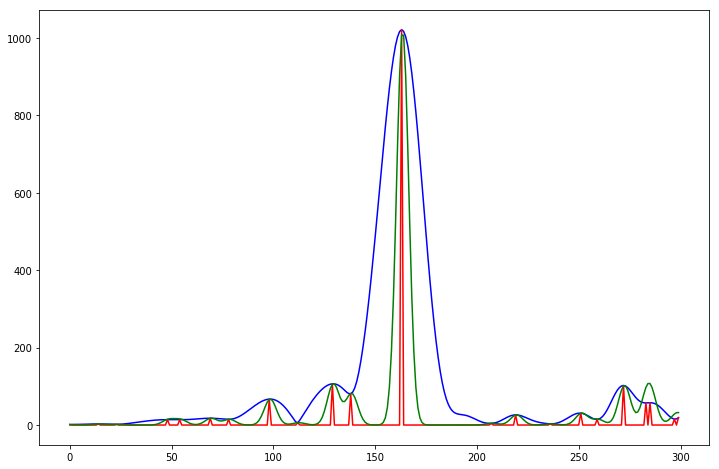

In [217]:
m = magnitude[100]
plt.figure(figsize=(12, 8))
plt.plot(m, 'b')


max_mask = np.r_[True, m[1:] > m[:-1]] & np.r_[m[:-1] > m[1:], True]
min_mask = np.r_[True, m[1:] < m[:-1]] & np.r_[m[:-1] < m[1:], True]

# plt.plot(min_mask * 1000, 'r')


sharp_peaks = np.zeros_like(m)
# sharp_peaks = m
# sharp_peaks = np.full_like(m, m.mean())


sharp_peaks[max_mask] = m[max_mask]
sharp_peaks[min_mask] = m[min_mask]
plt.plot(sharp_peaks, 'r')

# kernel = np.hanning(4)
kernel = gaussian(len(m), std=3)
plt.plot(np.correlate(sharp_peaks, kernel, mode='same'), 'g')
# plt.plot(np.correlate(m, kernel, mode='same'), 'g')

In [242]:
m.shape

(300,)

In [255]:
plt.figure(figsize=(12, 8))
# plt.plot(m, 'b')
kernel = gaussian(50, std=3) + 0.013
deconv, remainder = deconvolve(m, kernel)
print(deconv.shape)
# plt.plot(deconv)
# plt.plot(scipy.signal.convolve(deconv, kernel, mode='full') / deconv.sum())
# plt.plot(kernel)

(251,)


<Figure size 864x576 with 0 Axes>

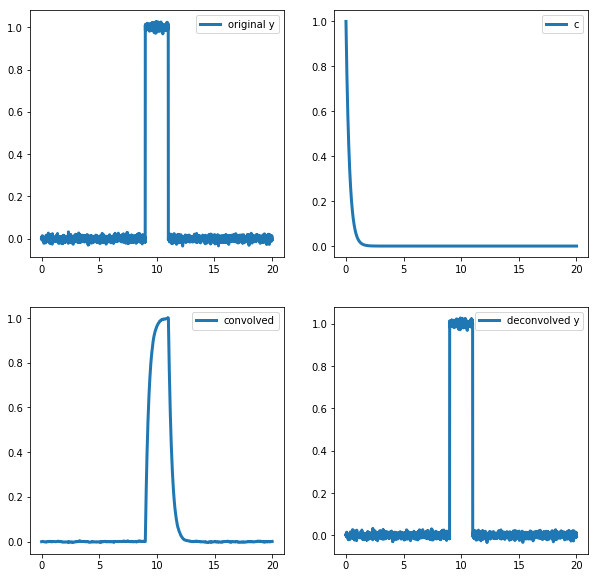

In [252]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

x = np.arange(0., 20.01, 0.01)
y = np.zeros(len(x))
y[900:1100] = 1.
y += 0.01 * np.random.randn(len(y))
c = np.exp(-(np.arange(len(y))) / 30.)

yc = scipy.signal.convolve(y, c, mode='full') / c.sum()
ydc, remainder = scipy.signal.deconvolve(yc, c)
ydc *= c.sum()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0][0].plot(x, y, label="original y", lw=3)
ax[0][1].plot(x, c, label="c", lw=3)
ax[1][0].plot(x[0:2000], yc[0:2000], label="convolved", lw=3)
ax[1][1].plot(x, ydc, label="deconvolved y", lw=3)

ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()



plt.show()

 # Sharp 2D

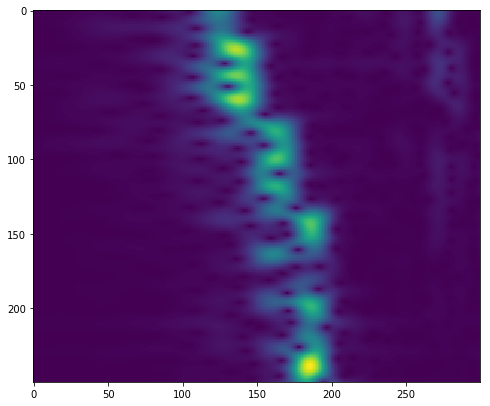

In [298]:
plt.figure(figsize=(8, 16))
plt.imshow(magnitude)

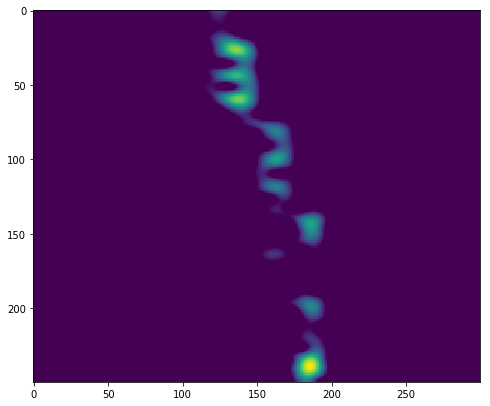

In [302]:
plt.figure(figsize=(8, 16))
plt.imshow(magnitude.clip(500, magnitude.max()))

In [273]:
magnitude.shape

(250, 300)

In [286]:
np.ones(4, dtype=bool).dtype

dtype('bool')

(250, 300) bool <class 'numpy.ndarray'>


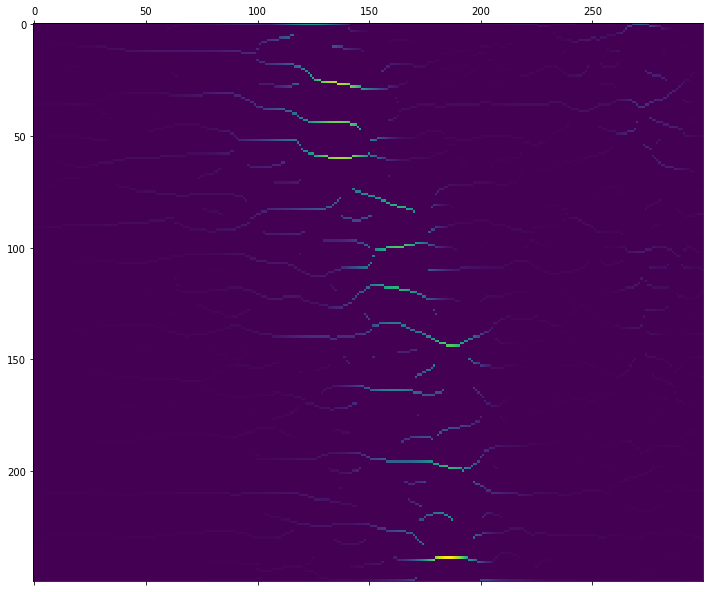

In [309]:
unit_2d = np.ones((1, magnitude.shape[1]), dtype=bool)

z0 = np.r_[unit_2d, magnitude[1:] > magnitude[:-1]]
z1 = np.r_[magnitude[:-1] > magnitude[1:], unit_2d]

z = z0 & z1

sharp_peaks = np.zeros_like(magnitude)
sharp_peaks[z] = magnitude[z]


print(z.shape, z.dtype, type(z))
plt.figure(figsize=(12, 12))
# plt.matshow(z, fignum=1)
plt.matshow(sharp_peaks, fignum=1)

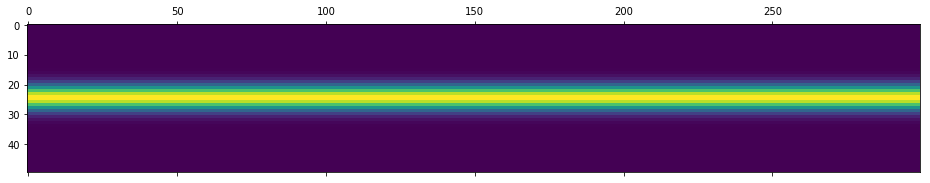

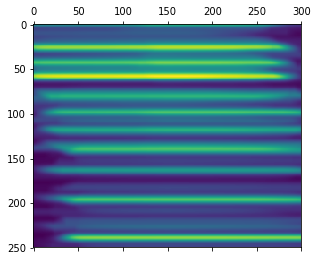

In [332]:
kernel = gaussian(50, std=3)
kernel_2d = np.tile(kernel, (magnitude.shape[1], 1)).T
plt.matshow(kernel_2d)
# plt.plot(kernel)
plt.matshow(correlate2d(sharp_peaks, kernel_2d, mode='same'))

# test if I can achieve min_max_mask using `np.diff` (== 0), `np.gradient`
if so - then i can calculate 2nd derivitive and find inflection points (not only extremums)

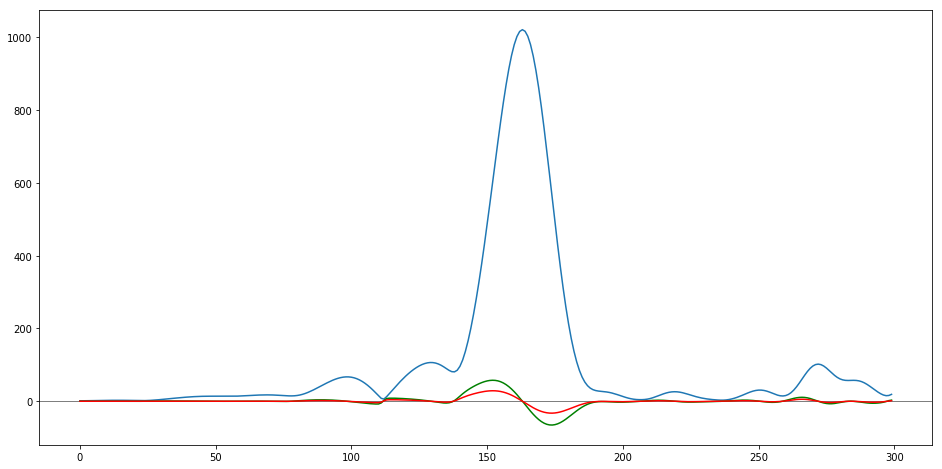

In [68]:
plt.figure(figsize=(16, 8))
plt.axhline(y=0, color='k', lw=0.5)
plt.plot(m)
plt.plot(np.gradient(m), 'g')
plt.plot(np.gradient(m, 2), 'r')

[ 0.99334665  0.97354586  0.91493286  0.81984437  0.69207128  0.53670749
  0.35994686  0.16883629 -0.02900525 -0.22569044 -0.41337807 -0.58458562
 -0.73248758 -0.85118758 -0.93595341 -0.98340573 -0.99165278 -0.96036575
 -0.89079197 -0.78570513 -0.6492947  -0.48699895 -0.30528808 -0.11140634
  0.08691682  0.28177488  0.46539947  0.63047004  0.77040577  0.87962785
  0.95378194  0.98991176  0.98657692  0.94391037  0.86361309  0.74888628
  0.60430374  0.43562952  0.24958812  0.05359644 -0.14453197 -0.33689835
 -0.51583365 -0.67420429 -0.80569653 -0.9050682  -0.96835765 -0.99304174
 -0.97813639 -0.96076174]


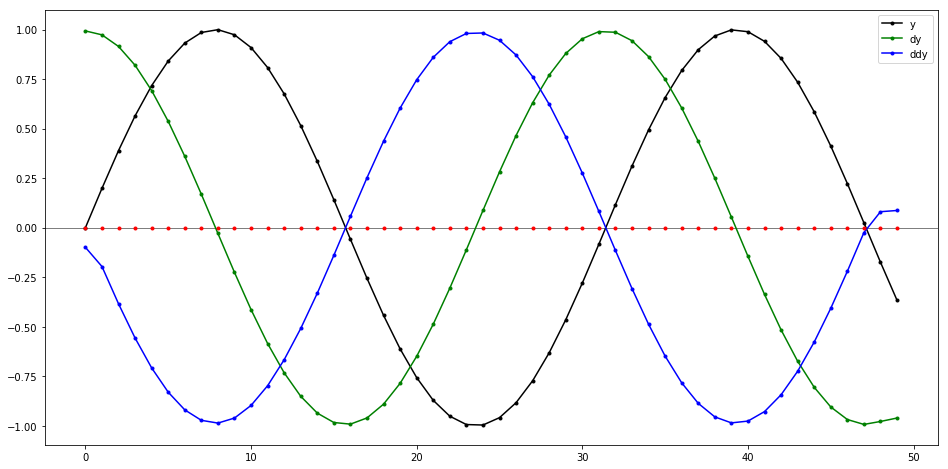

In [105]:
plt.figure(figsize=(16, 8))
plt.axhline(y=0, color='k', lw=0.5)

dx = 0.2
y = np.sin(np.arange(0, 10, dx))

dy  = np.gradient(y, dx)
ddy = np.gradient(dy, dx)




print(dy)
mask1 = dy == 0
z = np.zeros_like(y)
z[mask1] = y[mask1]

plt.plot(y, 'k.-', label='y')
plt.plot(dy, 'g.-', label='dy')
plt.plot(ddy, 'b.-', label='ddy')
plt.plot(z, 'r.')
plt.legend()
# plt.plot(np.gradient(y, dx, edge_order=1), 'g')
# plt.plot(np.gradient(y, dx, edge_order=2), 'r')

In [58]:
np.diff(np.array([4, 1, 2]))

array([-3,  1])

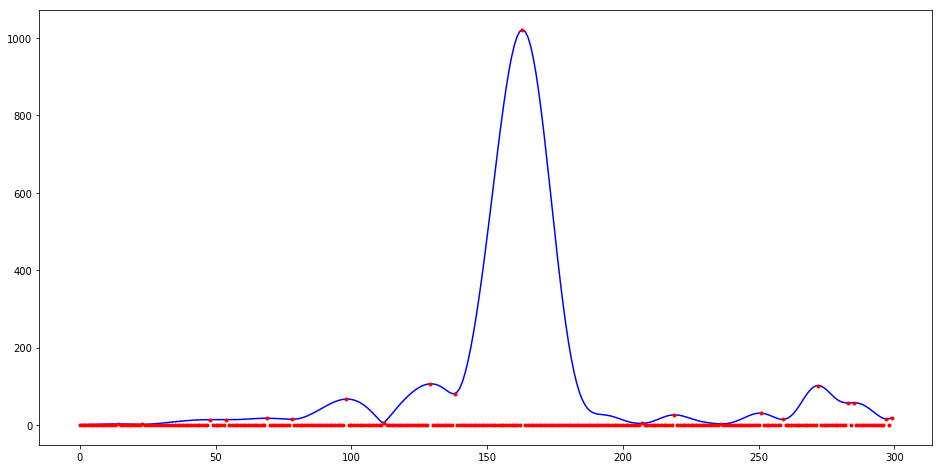

In [56]:
max_mask = np.r_[True, m[1:] > m[:-1]] & np.r_[m[:-1] > m[1:], True]
min_mask = np.r_[True, m[1:] < m[:-1]] & np.r_[m[:-1] < m[1:], True]

# min_max_mask = np.r_[max]


z = np.zeros_like(m)
z[min_mask] = m[min_mask]
z[max_mask] = m[max_mask]

plt.figure(figsize=(16, 8))


plt.plot(m, 'b')
plt.plot(z, 'r.')

In [270]:
m = magnitude[100]
plt.figure(figsize=(12, 8))
plt.plot(m, 'b')


max_mask = np.r_[True, m[1:] > m[:-1]] & np.r_[m[:-1] > m[1:], True]
min_mask = np.r_[True, m[1:] < m[:-1]] & np.r_[m[:-1] < m[1:], True]

# plt.plot(min_mask * 1000, 'r')


sharp_peaks = np.zeros_like(m)
# sharp_peaks = m
# sharp_peaks = np.full_like(m, m.mean())


sharp_peaks[max_mask] = m[max_mask]
sharp_peaks[min_mask] = m[min_mask]
plt.plot(sharp_peaks, 'r')

# kernel = np.hanning(4)
kernel = gaussian(len(m), std=3)
plt.plot(np.correlate(sharp_peaks, kernel, mode='same'), 'g')
# plt.plot(np.correlate(m, kernel, mode='same'), 'g')

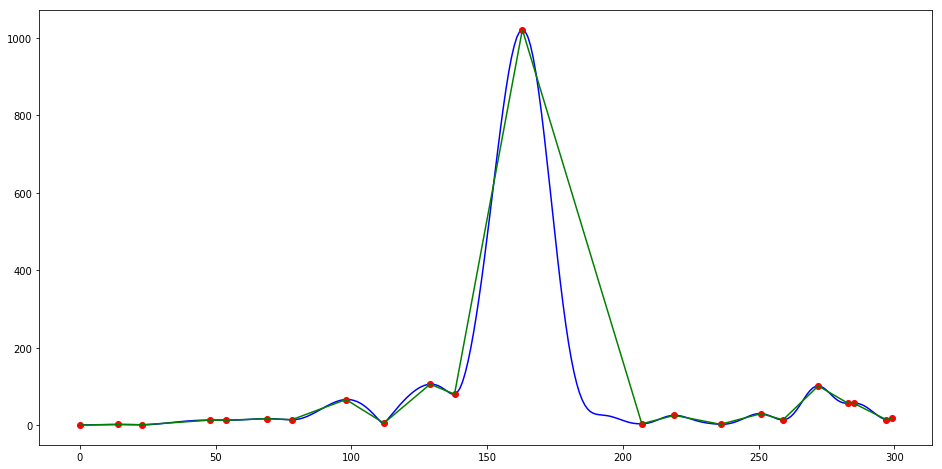

In [44]:
m = magnitude[100]

min_peaks = argrelmin(m)[0]
max_peaks = argrelmax(m)[0]

peaks = np.sort(np.r_[0, min_peaks, max_peaks, len(m) - 1])

xp = peaks
fp = m[peaks]


xnew = np.arange(len(m))
ynew = np.interp(xnew, xp, fp)

kernel = gaussian(20, std=3)
sharp = np.correlate(ynew, kernel, mode='same')





plt.figure(figsize=(16, 8))
plt.plot(m, 'b')
plt.plot(xp, fp, 'ro')
plt.plot(xnew, ynew, 'g')
# plt.plot(sharp, 'k')

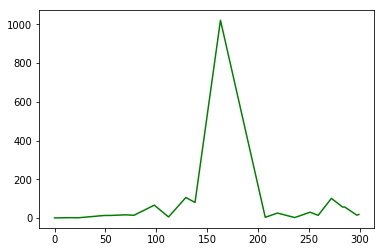

In [40]:
plt.plot(ynew, 'g')

In [37]:
np.sort(peaks)

array([  0,  14,  23,  48,  54,  69,  78,  98, 112, 129, 138, 163, 207,
       219, 236, 251, 259, 272, 283, 285, 297, 299])

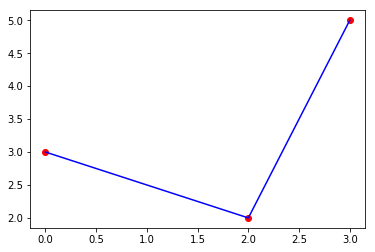

In [9]:
xp = [0, 2, 3]
fp = [3, 2, 5]

xnew = np.linspace(0, 3, 100)
ynew = np.interp(xnew, xp, fp)

plt.plot(xp, fp, 'ro')
plt.plot(xnew, ynew, 'b-')

In [7]:
np.linspace(0, 3, 100)

array([0.        , 0.03030303, 0.06060606, 0.09090909, 0.12121212,
       0.15151515, 0.18181818, 0.21212121, 0.24242424, 0.27272727,
       0.3030303 , 0.33333333, 0.36363636, 0.39393939, 0.42424242,
       0.45454545, 0.48484848, 0.51515152, 0.54545455, 0.57575758,
       0.60606061, 0.63636364, 0.66666667, 0.6969697 , 0.72727273,
       0.75757576, 0.78787879, 0.81818182, 0.84848485, 0.87878788,
       0.90909091, 0.93939394, 0.96969697, 1.        , 1.03030303,
       1.06060606, 1.09090909, 1.12121212, 1.15151515, 1.18181818,
       1.21212121, 1.24242424, 1.27272727, 1.3030303 , 1.33333333,
       1.36363636, 1.39393939, 1.42424242, 1.45454545, 1.48484848,
       1.51515152, 1.54545455, 1.57575758, 1.60606061, 1.63636364,
       1.66666667, 1.6969697 , 1.72727273, 1.75757576, 1.78787879,
       1.81818182, 1.84848485, 1.87878788, 1.90909091, 1.93939394,
       1.96969697, 2.        , 2.03030303, 2.06060606, 2.09090909,
       2.12121212, 2.15151515, 2.18181818, 2.21212121, 2.24242

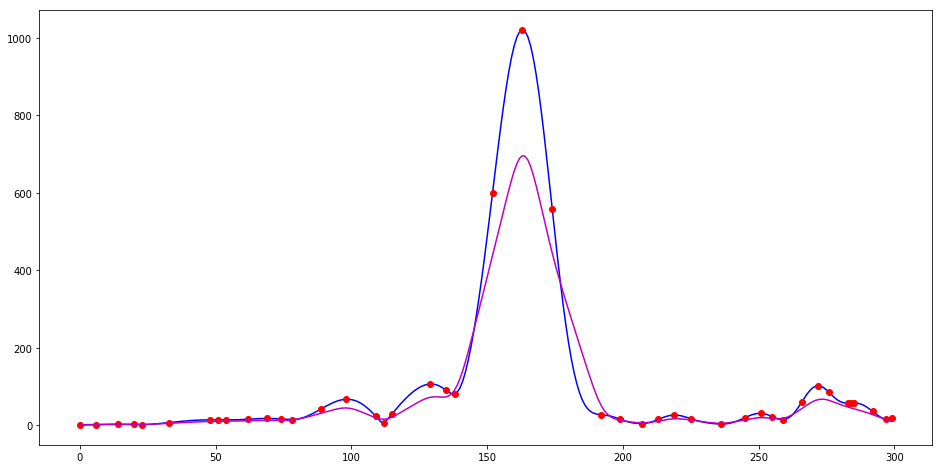

In [124]:
m = magnitude[100]

m_min_peaks = argrelmin(m)[0]
m_max_peaks = argrelmax(m)[0]




# inflection_mask
# dm  = np.gradient(m, dx)
dm  = np.gradient(m)

dm_min_peaks = argrelmin(dm)[0]
dm_max_peaks = argrelmax(dm)[0]





peaks = np.sort(
    np.r_[
        0,
        m_min_peaks,
        m_max_peaks,
        dm_min_peaks,
        dm_max_peaks,
        len(m) - 1
    ]
)

xp = peaks
fp = m[peaks]

xnew = np.arange(len(m))
ynew = np.interp(xnew, xp, fp)



kernel = gaussian(200, std=3)
sharp = np.correlate(ynew, kernel, mode='same')





plt.figure(figsize=(16, 8))
plt.plot(m, 'b')
# plt.plot(dm)
# plt.plot(ddm)
plt.plot(xp, fp, 'ro')
plt.plot(xnew, ynew, 'g')
plt.plot(0.1 * sharp, 'm')

In [ ]:


plt.figure(figsize=(16, 8))
plt.plot(m, 'b')